# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


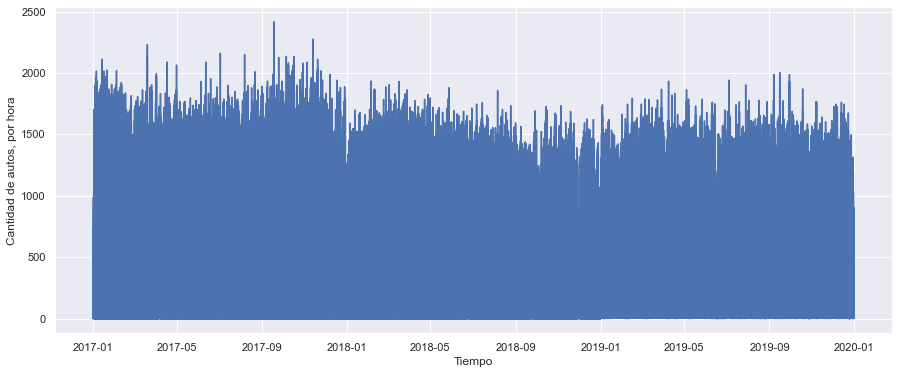

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
#plt.xlim(datetime.date(2017,1,1), datetime.date(2017,1,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


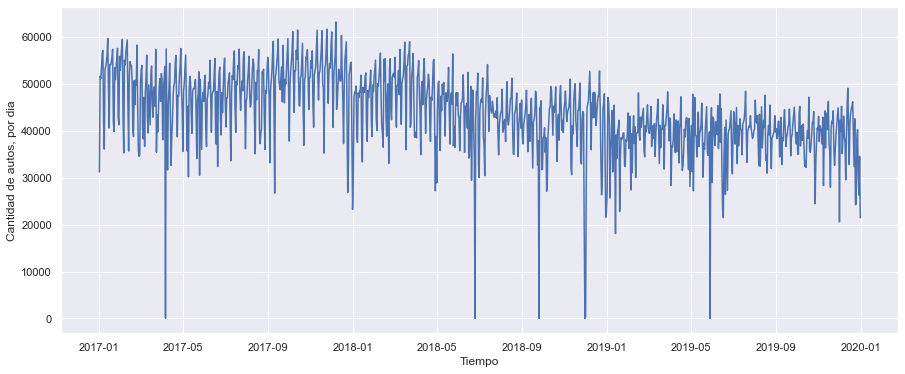

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

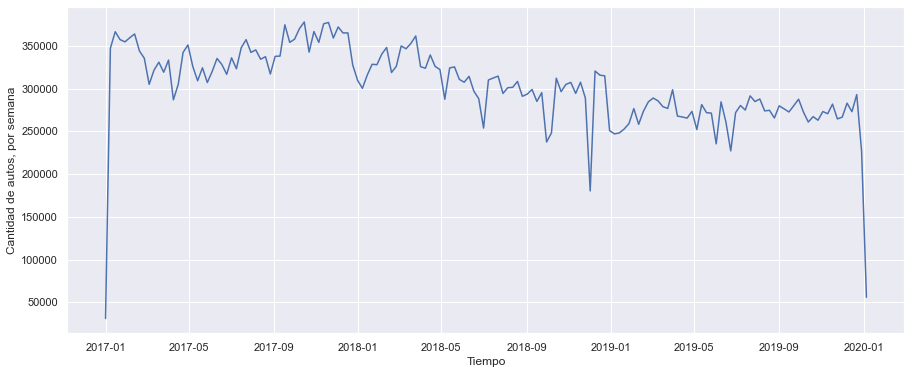

In [17]:
#Resampleamos nuestros datos para agrupar por semana, y asi tal vez lograr una visualización mas amigable
semanal = dataset.resample('W', on = 'fecha').sum()
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

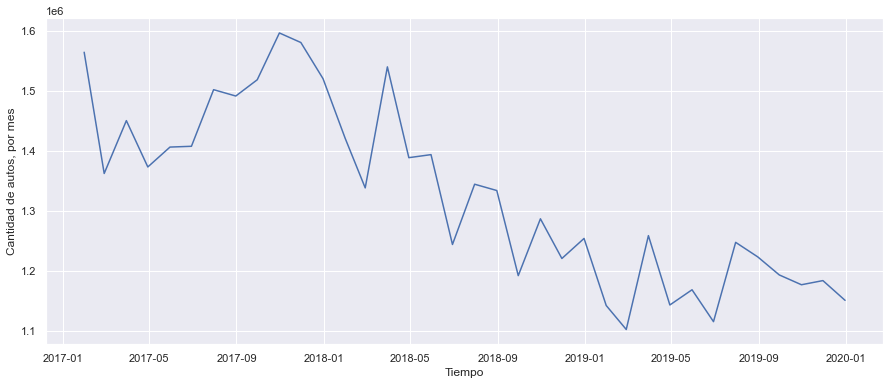

In [18]:
#Resampleamos nuestros datos para agrupar por mes, y asi tal vez lograr una visualización mas amigable
mensual = dataset.resample('M', on = 'fecha').sum()
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

#### Agrupando los datos por mes podemos ver una clara visualización

# Analisis exploratorio de datos y Componentes de la serie

In [19]:
dataset.head()


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


In [21]:
dataset.tipo_vehiculo.unique()

array(['Pesado', 'Liviano'], dtype=object)

In [22]:
dataset.dia.unique()

array(['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
       'Sábado'], dtype=object)

In [23]:
dataset.sentido.unique()

array(['Provincia', 'Centro'], dtype=object)

In [24]:
dataset.describe()

,cantidad_pasos
count,238869.000000
mean,200.384232
std,403.246904
min,1.000000
25%,2.000000
50%,11.000000
75%,104.000000
max,2416.000000


### El trafico de vehiculos pesados cambia igual que el de livianos?


In [25]:
pesado=dataset[dataset.tipo_vehiculo=='Pesado']
pesado.reset_index(drop=True,inplace=True)
semanal2 = pesado.resample('W', on = 'fecha').sum()

liviano=dataset[dataset.tipo_vehiculo=='Liviano']
liviano.reset_index(drop=True,inplace=True)
semanal3 = liviano.resample('W', on = 'fecha').sum()

In [26]:
ventana = int(365*1/7)
semanal_promedio_tendencia2 = semanal2.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia3 = semanal3.rolling(window=ventana, center = True).mean()

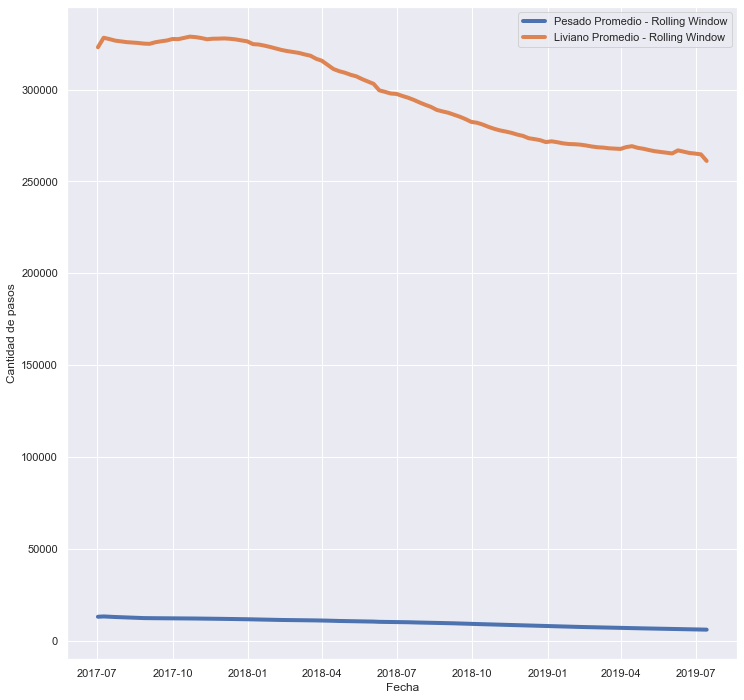

In [27]:
plt.figure(figsize = (12,12))
plt.plot(semanal_promedio_tendencia2, lw = 4, label = 'Pesado Promedio - Rolling Window')
plt.plot(semanal_promedio_tendencia3, lw = 4, label = 'Liviano Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Trafico Pesado


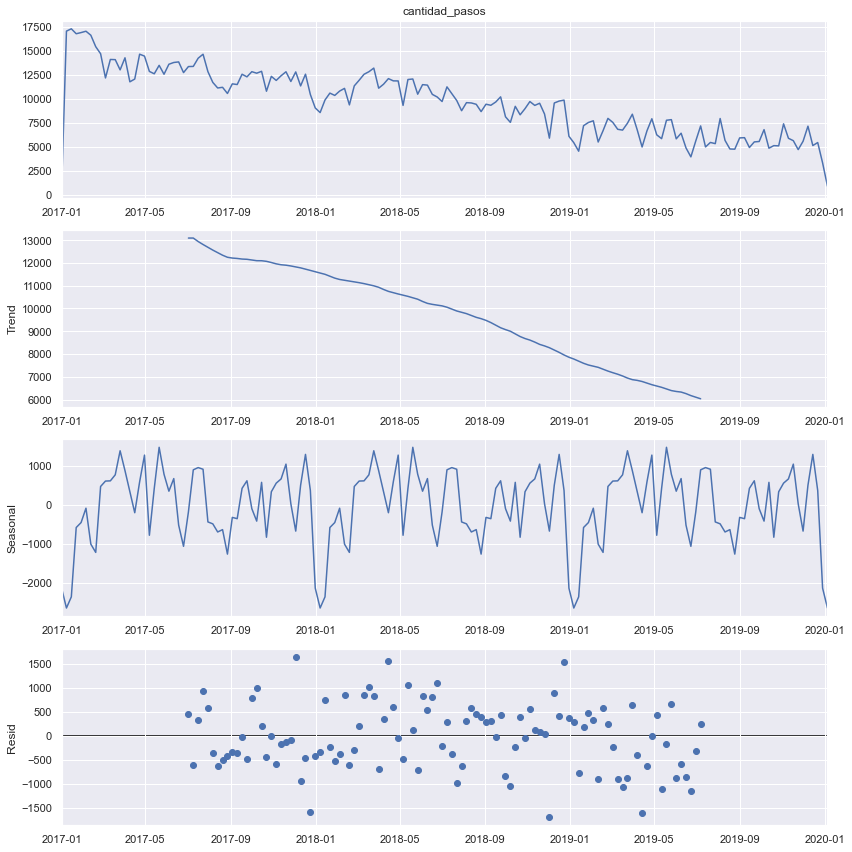

In [28]:
#Tendencias, estacionales y residuales del trafico liviano y pesado

from statsmodels.tsa.seasonal import seasonal_decompose
result1 = seasonal_decompose(semanal2.cantidad_pasos, model='additive')
print('Trafico Pesado')
plt.rcParams['figure.figsize'] = [12,12]
result1.plot()
plt.show()

Trafico Liviano


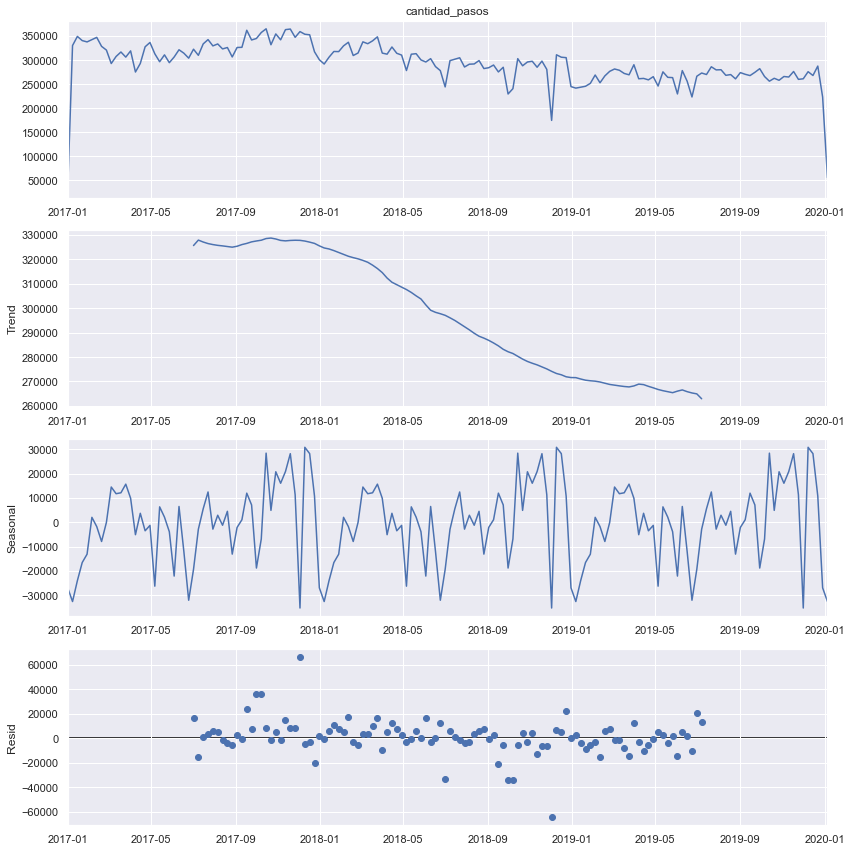

In [29]:
plt.rcParams['figure.figsize'] = [12,12]
result2 = seasonal_decompose(semanal3.cantidad_pasos, model='additive')
print('Trafico Liviano')
result2.plot()
plt.show()

#### Como se puede ver en los graficos el trafico liviano es mucho mas grande que el pesado. A esto le podemos sumar que el trafico pesado por el peaje Illia tiene una tendencia mas negativa que el trafico liviano, y que esta tendencia negativa ha sido mas sostenida en el tiempo que la tendencia del trafico liviano. Con esto podemos concluir que menos vehiculos del tipo pesado estan utilizando el peaje Illia, y en menor medida los de tipo liviano. Tambien de este se puede afirmar que en estos ultimos años la tendencia negativa de vehiculos livianos se ha pronunciado mas.

## Como son las tendencias y comportamientos estacionales?

In [30]:
result = seasonal_decompose(semanal.cantidad_pasos, model='additive')

<Figure size 864x864 with 0 Axes>

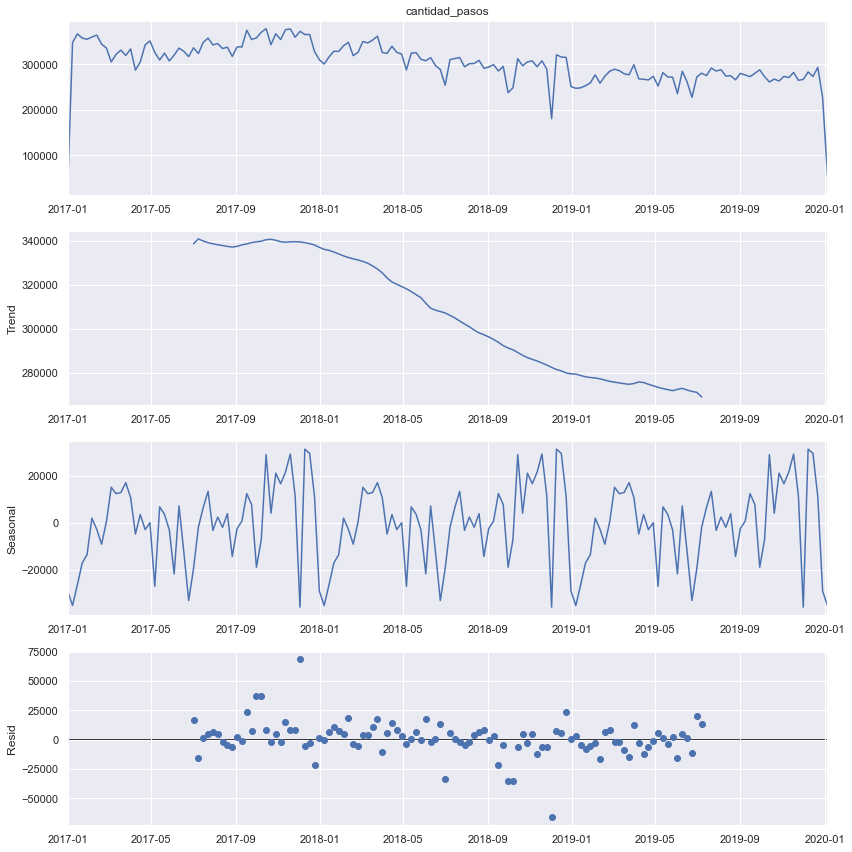

In [31]:
plt.figure(figsize=(12,12))
result.plot()
plt.show()

#### Al ver la tendencia negativa y que posiblemente haya una migracion de los pagos de efectivo a otros tipos de pago, vamos a incluir todos los tipos de pago para observar la tendencia.

In [32]:
dat = pd.concat([data_2019, data_2018, data_2017])
dat = dat[dat.estacion=='Illia']
dat.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
dat.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
19,2019-01-01,1,Martes,Centro,Liviano,146
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
22,2019-01-01,1,Martes,Provincia,Liviano,147
23,2019-01-01,1,Martes,Provincia,Liviano,106


In [33]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dat['fecha2'] = pd.to_datetime(dat.fecha) + pd.to_timedelta(dat.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dat.drop(columns=['fecha','hora_fin'], inplace = True)

dat.head()

#Corregimos el nombre de fecha2 a fecha
dat.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dat.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
19,Martes,Centro,Liviano,146,2019-01-01 01:00:00
20,Martes,Centro,Liviano,59,2019-01-01 01:00:00
21,Martes,Centro,Pesado,1,2019-01-01 01:00:00
22,Martes,Provincia,Liviano,147,2019-01-01 01:00:00
23,Martes,Provincia,Liviano,106,2019-01-01 01:00:00


In [34]:
#Reordenamos el dataset por fecha
dat.sort_values('fecha', inplace = True)
dat.reset_index(drop=True, inplace = True)
dat

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Liviano,459,2017-01-01 00:00:00
1,Domingo,Provincia,Pesado,3,2017-01-01 00:00:00
2,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,7,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
...,...,...,...,...,...
752547,Martes,Centro,Liviano,122,2019-12-31 23:00:00
752548,Martes,Centro,Liviano,3,2019-12-31 23:00:00
752549,Martes,Centro,Liviano,4,2019-12-31 23:00:00
752550,Martes,Centro,Liviano,1,2019-12-31 23:00:00


#### Realizamos las mismas modificaciones que le realizamos al primer dataset.

<Figure size 864x864 with 0 Axes>

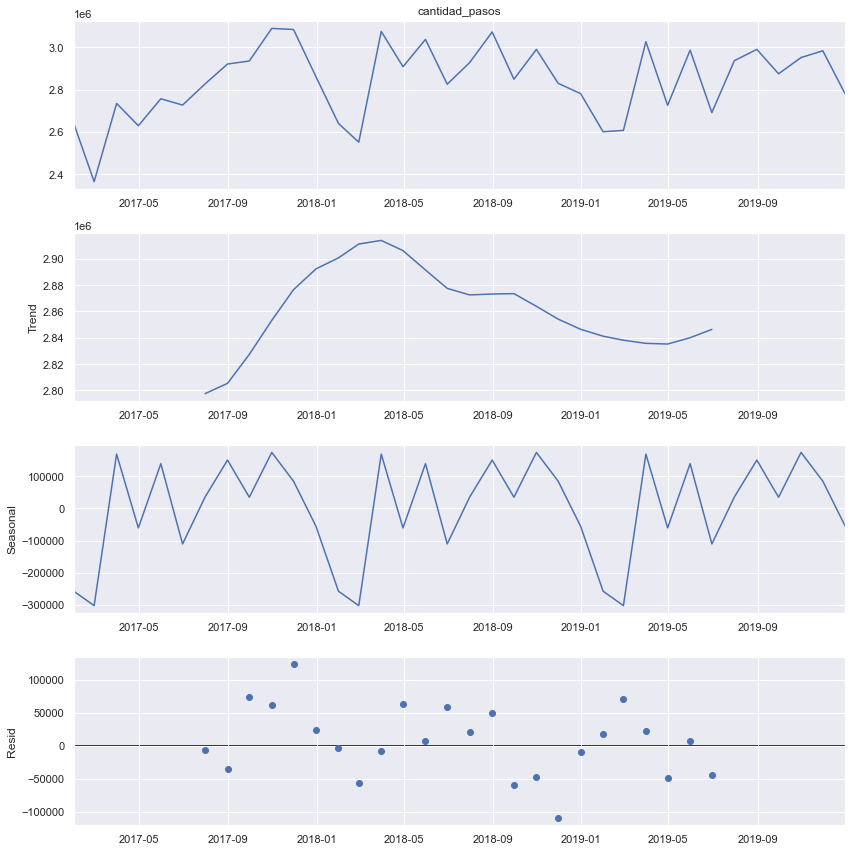

In [35]:
semanal_full = dat.resample('M', on = 'fecha').sum()
result_full = seasonal_decompose(semanal_full.cantidad_pasos, model='additive')
plt.figure(figsize=(12,12))
result_full.plot()
plt.show()

#### Se puede ver que la tendencia que arrastraba durante el 2018 (negativa) hasta mediados de 2019 finaliza, hay un repunte en el transito de el peaje Illia si incluimos todas las formas de pago.

#### Encontre noticias en donde se estaba realizando obras en la autopista Illia para construir una nueva traza. Las obras fueron finalizadas en 2019 lo que puede explicar la tendencia negativa y el repunte de el transito en Illia. Noticias: https://www.lanacion.com.ar/sociedad/ciudad-obras-paseo-del-bajo-y-otros-proyectos-costosos-ultima-decada-nid2175899 https://www.infobae.com/sociedad/2019/05/25/el-paseo-del-bajo-por-dentro-el-trayecto-que-antes-consumia-45-minutos-ahora-se-hace-en-10/



#### Ademas tambien podemos afirmar que hay una migracion del pago en efectivo a la utilizacion del Telepase, que va a influir en la tendencia.

# Prediccion a futuro

## Vamos a trabajar con nuestros datos agrupados por dia

In [70]:
df=dataset

In [71]:
df.head(5)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


In [73]:
df.tipo_vehiculo.unique()

array(['Pesado', 'Liviano'], dtype=object)

In [74]:
df.sentido.unique()

array(['Provincia', 'Centro'], dtype=object)

In [75]:
df.dia.unique()

array(['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
       'Sábado'], dtype=object)

In [76]:
#Observamos la variable cantidad de pasos
df.describe()

,cantidad_pasos
count,238869.000000
mean,200.384232
std,403.246904
min,1.000000
25%,2.000000
50%,11.000000
75%,104.000000
max,2416.000000


In [77]:
#Verificamos los nulos que posee el dataset
df.isna().sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

In [79]:
#from sklearn.preprocessing import OneHotEncoder

In [80]:
#dia_get=pd.get_dummies(dataset['dia'])
#vehiculo_get=pd.get_dummies(dataset['tipo_vehiculo'])
#sentido_get=pd.get_dummies(dataset['sentido'])

In [81]:
#df=pd.concat([dataset, dia_get,vehiculo_get, sentido_get], axis=1)

In [82]:
#columnas_descartables = ['dia','tipo_vehiculo','sentido']
#df = df.drop(columns=columnas_descartables)
#df.reset_index(drop=True, inplace = True)

In [83]:
#df.head()

In [86]:
df.shape

(238869, 5)

## Manejo de outliers

In [90]:
Q1 = df.cantidad_pasos.quantile(0.25)
Q3 = df.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1;
df=df[~((df.cantidad_pasos < (Q1 - 1.5 * IQR)) |(df.cantidad_pasos > (Q3 + 1.5 * IQR)))]
df.shape

(192654, 5)

In [91]:
#diario[diario > lmax] = np.nan
#diario[diario < lmin] = np.nan

In [94]:
print(df.isna().sum())
df = df.interpolate()
print(df.isna().sum())

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64
dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64


In [95]:
df.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01
5,Domingo,Provincia,Pesado,2,2017-01-01


## Encodeado

#### Sumamos a nuestro dataset los dias, el tipo de vehiculo y el sentido para tener una mayor disponibilidad de datos para los modelos

In [96]:
# Traemos los datos agrupados por dia
diario = df.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,2925
2017-01-02,7819
2017-01-03,7151
2017-01-04,8303
2017-01-05,8314


In [97]:
dias=df.dia.unique()
dias.tolist()

['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

In [98]:
tipo=df.tipo_vehiculo.unique()
tipo.tolist()

['Pesado', 'Liviano']

In [99]:
sentido=df.sentido.unique()
sentido.tolist()

['Provincia', 'Centro']

In [100]:
for i in dias:
    feat=df[df.dia==i]
    feat.reset_index(drop=True,inplace=True)
    variable=feat.resample('D', on = 'fecha').sum()
    diario[i]=variable.cantidad_pasos

In [101]:
for i in tipo:
    feat=df[df.tipo_vehiculo==i]
    feat.reset_index(drop=True,inplace=True)
    variable=feat.resample('D', on = 'fecha').sum()
    diario[i]=variable.cantidad_pasos

In [102]:
for i in sentido:
    feat=df[df.sentido==i]
    feat.reset_index(drop=True,inplace=True)
    variable=feat.resample('D', on = 'fecha').sum()
    diario[i]=variable.cantidad_pasos

In [103]:
diario.head()

,cantidad_pasos,Domingo,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Pesado,Liviano,Provincia,Centro
fecha,,,,,,,,,,,,
2017-01-01,2925,2925.0,NaN,NaN,NaN,NaN,NaN,NaN,542,2383,1663,1262
2017-01-02,7819,0.0,7819.0,NaN,NaN,NaN,NaN,NaN,2589,5230,3402,4417
2017-01-03,7151,0.0,0.0,7151.0,NaN,NaN,NaN,NaN,2771,4380,2986,4165
2017-01-04,8303,0.0,0.0,0.0,8303.0,NaN,NaN,NaN,2751,5552,3553,4750
2017-01-05,8314,0.0,0.0,0.0,0.0,8314.0,NaN,NaN,2864,5450,3810,4504


## Manejo de NaN

In [104]:
diario=diario.fillna(0)

In [105]:
diario=round(diario)
diario.head()

,cantidad_pasos,Domingo,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Pesado,Liviano,Provincia,Centro
fecha,,,,,,,,,,,,
2017-01-01,2925,2925.0,0.0,0.0,0.0,0.0,0.0,0.0,542,2383,1663,1262
2017-01-02,7819,0.0,7819.0,0.0,0.0,0.0,0.0,0.0,2589,5230,3402,4417
2017-01-03,7151,0.0,0.0,7151.0,0.0,0.0,0.0,0.0,2771,4380,2986,4165
2017-01-04,8303,0.0,0.0,0.0,8303.0,0.0,0.0,0.0,2751,5552,3553,4750
2017-01-05,8314,0.0,0.0,0.0,0.0,8314.0,0.0,0.0,2864,5450,3810,4504


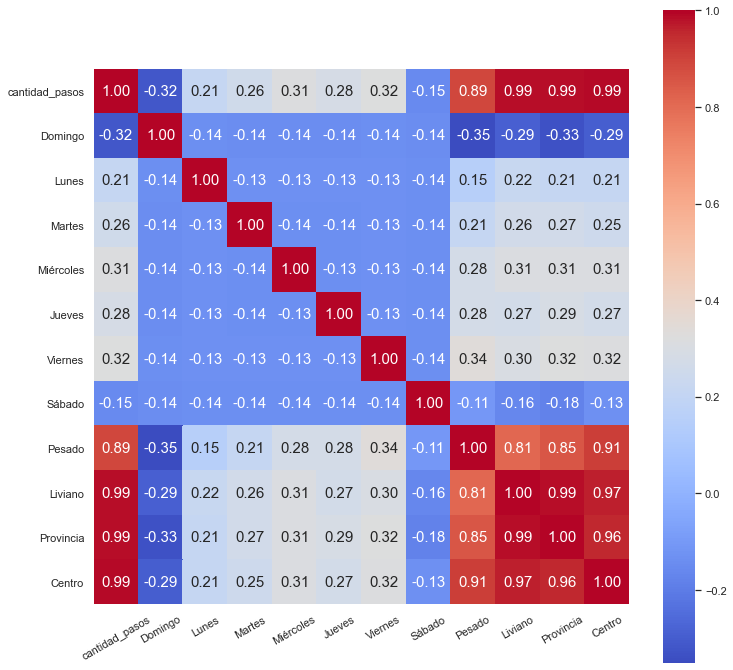

In [106]:
corr = diario.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},   #annot_kws(tamaño de adentro)
           cmap= 'coolwarm')
plt.xticks(rotation = 30)
plt.show()

## Visualizaciones

#### Graficamos las tendencias, residuales y estacionalidad para ver su comportamiento.

<Figure size 864x864 with 0 Axes>

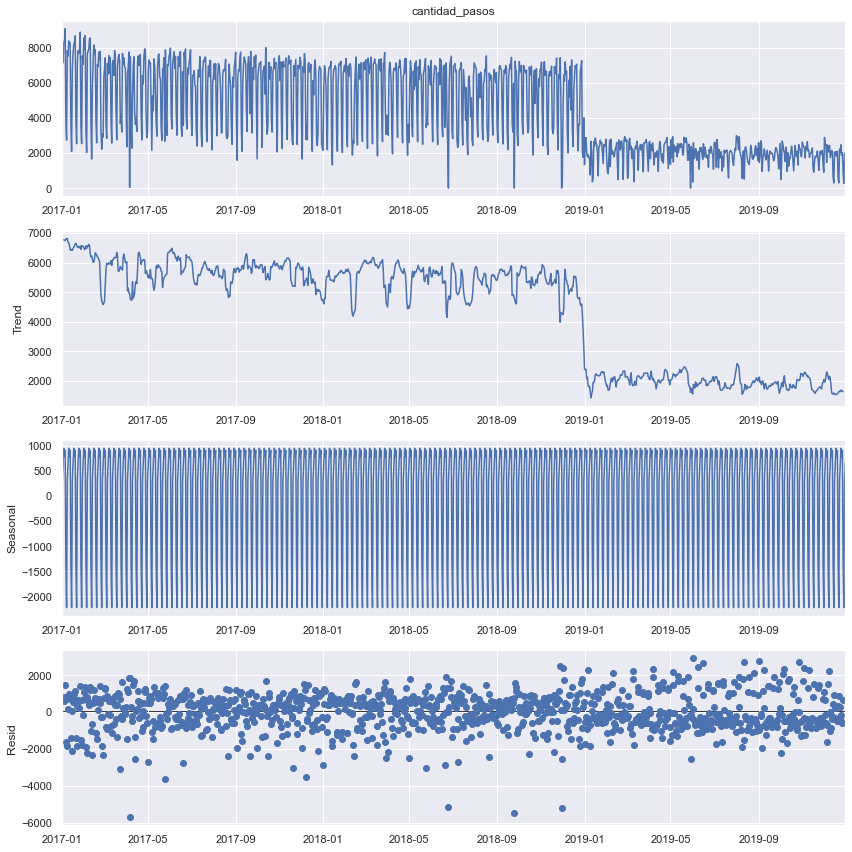

In [107]:
result = seasonal_decompose(diario.cantidad_pasos, model='additive')
plt.figure(figsize=(12,12))
result.plot()
plt.show()

C:\Users\Martin\miniconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Martin\miniconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


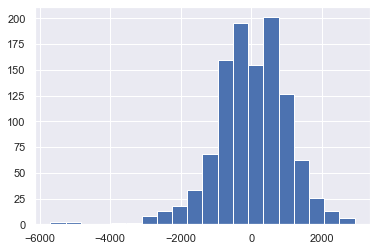

In [108]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

## Rolling Window

In [109]:
ventana = int(365*5/7)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()

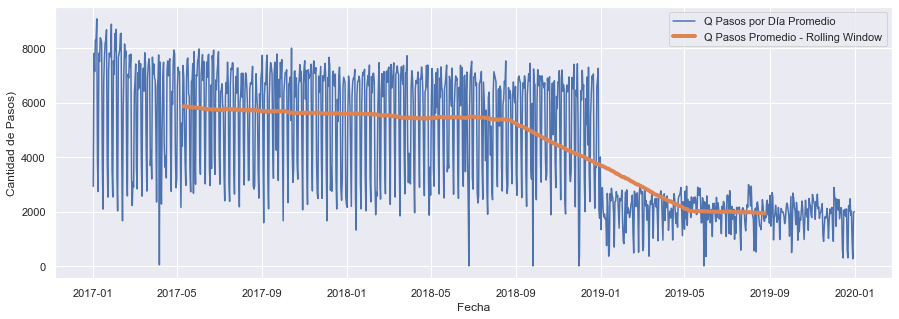

In [110]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Q Pasos por Día Promedio')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Q Pasos Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos)')
plt.legend()
plt.show()

## Autocorrelacion

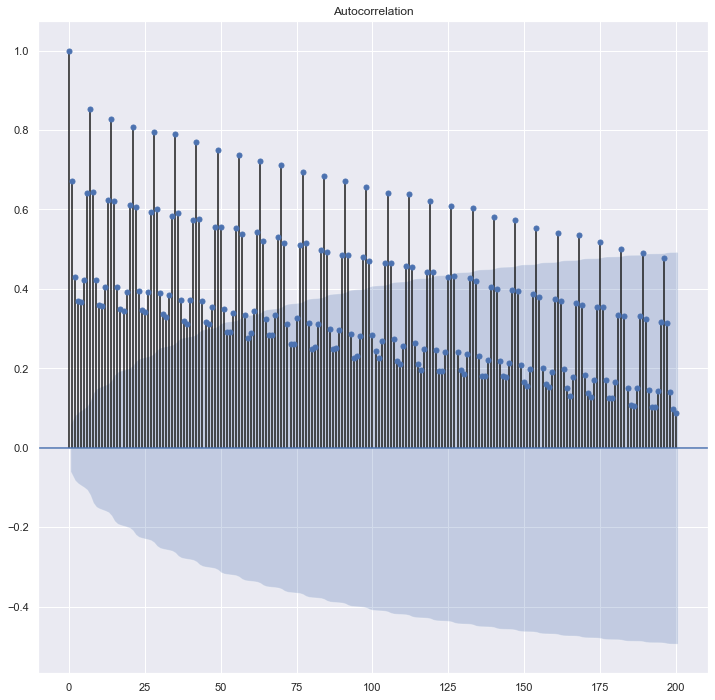

In [111]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 200)
plt.show()

## Train test split

In [112]:
look_back = 30
N = diario.shape[0]
N 

1095

In [113]:
N = diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1064, 30) (1064,)


In [114]:
for i in range(X.shape[0]):
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]
    #X[i,:] = diario.iloc[i:i+look_back]
    #y[i] = diario.iloc[i+look_back]

In [162]:
N_train = 365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 182 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(335, 30) (335,)
(182, 30) (182,)


## Modelo Benchmark

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [164]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]


In [165]:
benchmark_mae = mean_absolute_error(y_test, y_test_pred_benchmark)
print('El error absoluto medio sobre el set de benchmark:',benchmark_mae)
print()

benchmark_test = np.sqrt(mean_squared_error(y_test, y_test_pred_benchmark))
print(f'El error cuadrático medio sobre el set de benchmark: {benchmark_test}')
print()

El error absoluto medio sobre el set de benchmark: 1603.8846153846155

El error cuadrático medio sobre el set de benchmark: 2205.1523868999507



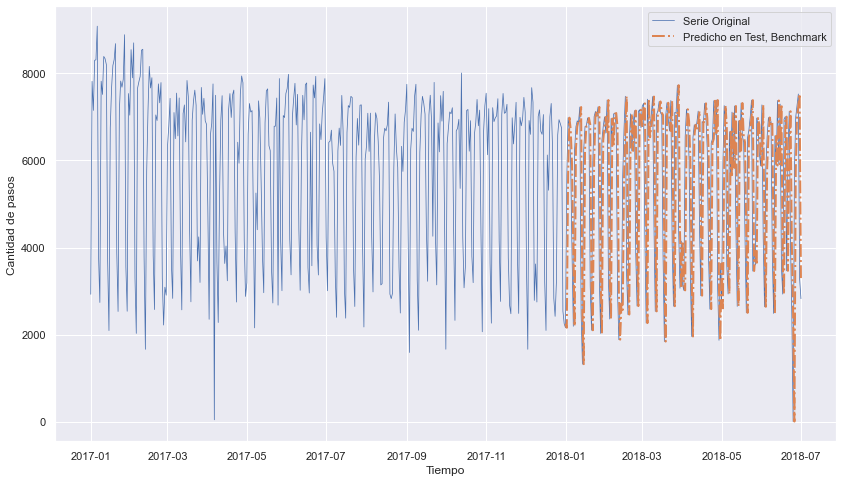

In [166]:
plt.figure(figsize=(14,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

## Random Forest

In [167]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4, warm_start= True).fit(X_train,y_train)

In [168]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [169]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'El error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
print(f'El error cuadrático medio sobre el set de evaluacion: {rmse_test}')


El error absoluto medio sobre el set de entrenamiento: 258.1754029850746
El error absoluto medio sobre el set de evaluacion: 633.7041758241759

El error cuadrático medio sobre el set de entrenamiento: 381.98718658122397
El error cuadrático medio sobre el set de evaluacion: 1035.1088919725594


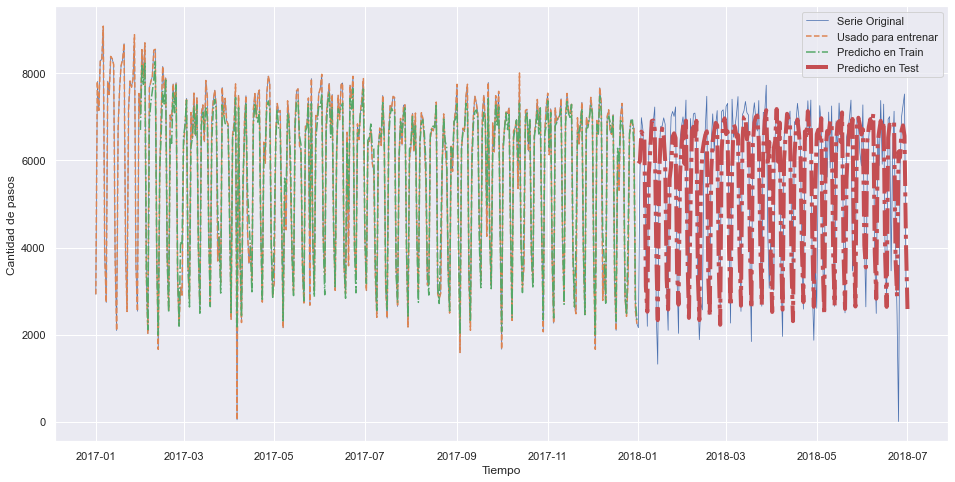

In [170]:
plt.figure(figsize=(16,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

### Optimizacion de hiperparametros

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [174]:
parametros= { 'n_estimators':[100,200,500,1000],'max_features': ['auto', 'sqrt', 'log2'], 'criterion':['mse', 'mae'],'n_jobs':[3,4,5,6]
            ,'warm_start':[True] }

In [175]:
model = RandomizedSearchCV(rf,parametros,n_jobs=-1,cv=None)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=4,
                 

In [176]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')



Mejores parametros: {'warm_start': True, 'n_jobs': 5, 'n_estimators': 200, 'max_features': 'log2', 'criterion': 'mae'}
Mejor Score: 0.6989517063652105



In [177]:
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_n_jobs,param_n_estimators,param_max_features,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.1920,0.224320,0.0474,0.011993,True,5,100,sqrt,mae,"{'warm_start': True, 'n_jobs': 5, 'n_estimator...",0.497175,0.653036,0.830708,0.725908,0.771893,0.695744,0.115045,2
1,1.0360,0.138743,0.0748,0.012890,True,4,200,sqrt,mse,"{'warm_start': True, 'n_jobs': 4, 'n_estimator...",0.485541,0.638665,0.825659,0.756838,0.763259,0.693992,0.120496,4
2,56.0730,4.578676,1.1350,0.282694,True,3,1000,auto,mae,"{'warm_start': True, 'n_jobs': 3, 'n_estimator...",0.467556,0.628433,0.827969,0.697770,0.782727,0.680891,0.126926,6
3,1.5636,0.171980,0.4386,0.104836,True,3,100,auto,mse,"{'warm_start': True, 'n_jobs': 3, 'n_estimator...",0.390747,0.586961,0.835209,0.720431,0.793756,0.665421,0.161199,10
4,23.8056,1.411963,1.1614,0.167026,True,6,500,auto,mae,"{'warm_start': True, 'n_jobs': 6, 'n_estimator...",0.468492,0.622290,0.823316,0.697798,0.786321,0.679644,0.126670,8
5,5.5518,1.161221,0.5820,0.339311,True,4,100,auto,mae,"{'warm_start': True, 'n_jobs': 4, 'n_estimator...",0.488321,0.615264,0.817853,0.695240,0.785141,0.680364,0.119349,7
6,2.9848,0.448164,0.1886,0.116199,True,5,200,sqrt,mae,"{'warm_start': True, 'n_jobs': 5, 'n_estimator...",0.481009,0.646433,0.823832,0.730497,0.775179,0.691390,0.120310,5
7,11.7612,1.092159,0.5282,0.267020,True,5,1000,log2,mae,"{'warm_start': True, 'n_jobs': 5, 'n_estimator...",0.491972,0.647709,0.829194,0.738971,0.766186,0.694806,0.117018,3
8,1.6128,0.167846,0.1218,0.070884,True,4,200,auto,mse,"{'warm_start': True, 'n_jobs': 4, 'n_estimator...",0.406375,0.598283,0.839833,0.710476,0.792136,0.669421,0.154944,9
9,2.4464,0.253132,0.1556,0.097403,True,5,200,log2,mae,"{'warm_start': True, 'n_jobs': 5, 'n_estimator...",0.504456,0.649143,0.825672,0.748269,0.767218,0.698952,0.112659,1


In [178]:
y_pred = model.predict(X)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [179]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print('El error absoluto medio sobre el set de entrenamiento:', train_mae)
print('El error absoluto medio sobre el set de evaluacion:',test_mae)
print()

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'El error cuadrático medio sobre el set de entrenamiento: {rmse_train}')
print(f'El error cuadrático medio sobre el set de evaluacion: {rmse_test}')


El error absoluto medio sobre el set de entrenamiento: 261.540171641791
El error absoluto medio sobre el set de evaluacion: 663.0855494505495

El error cuadrático medio sobre el set de entrenamiento: 380.2775316460757
El error cuadrático medio sobre el set de evaluacion: 1054.2101450250627


## Multi-Step Prediction

In [171]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [172]:
MAE = mean_absolute_error(y_test, y_ms_test_pred)
RMSE = mean_squared_error(y_test, y_ms_test_pred)
print('El error absoluto medio sobre el set de evaluacion:',(MAE))
print('El error cuadratico medio sobre el set de evaluacion:',np.sqrt(RMSE))

El error absoluto medio sobre el set de evaluacion: 586.2252197802197
El error cuadratico medio sobre el set de evaluacion: 1087.7464804363415


## Importancia de features del Random Forest

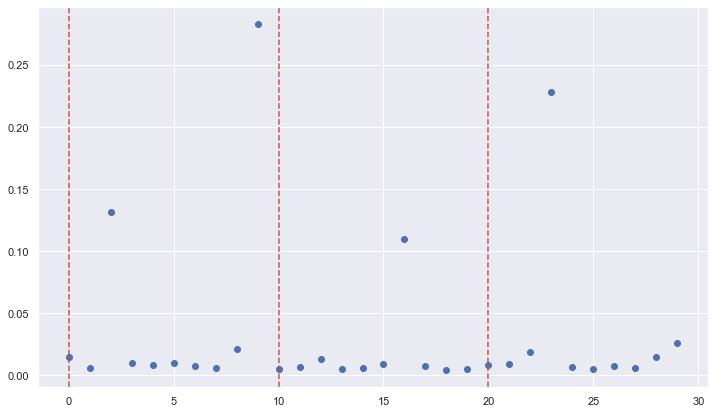

In [181]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*10:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

#### Con respecto al resultado de las importancias de las features era lo que esperaba. El dia al que le da mas importancia para predecir es el mismo dia de la semana siguiente lo cual es logico.

#### En cuanto a los modelos cambia mucho su efectividad de acuerdo a la proporcion del train test split. One step prediction (benchmark) resulta muy malo cuando predecimos a corto plazo pero es muy bueno cuando predecimos a largo plazo, Ej: utilizamos 2017 y 2018 para predecir 2019.


#### Random Forest es el mas equilibrado de todos ya que resulta muy bueno para predecir a corto y largo plazo. La desventaja es que no mejoro con la optimizacion de hiperparametros.

#### Por ultimo multi-step prediction es el mejor a corto plazo pero es el peor a largo plazo.

#### Elegiria el modelo de Random Forest ya que es el mas equilibrado y en general entrega muy buenos resultados.

# Investigacion

Me gustaria probar la libreria prophet que se especializa en el estudio o de las series de tiempo, yo creo que los resultados van a ser mucho mejores. 
Tambien implementaria mas modelos para encontrar el mas exacto, ademas me gustaria sumar las demas features al estudio como el tipo de trafico, el sentido y los dias. Todas estas implementaciones van a mejorar los resultados que sobre el dataset.

Por ultimo tambien podemos añadir años anteriores para contar con mas datos e incluir en el dataset todas las formas de pago.

Por ejemplo, vamos a incluir todas las formas de pago de la estacion Illia:

In [185]:
dat.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Liviano,459,2017-01-01
1,Domingo,Provincia,Pesado,3,2017-01-01
2,Domingo,Provincia,Pesado,1,2017-01-01
3,Domingo,Provincia,Pesado,7,2017-01-01
4,Domingo,Provincia,Pesado,6,2017-01-01


In [187]:
diario2 = dat.resample('D', on = 'fecha').sum()
print(diario2.shape)
diario2.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,45478
2017-01-02,89289
2017-01-03,92602
2017-01-04,95813
2017-01-05,100044


In [188]:
ventana = int(365*5/7)
diario_promedio_tendencia2 = diario2.cantidad_pasos.rolling(window=ventana, center = True).mean()

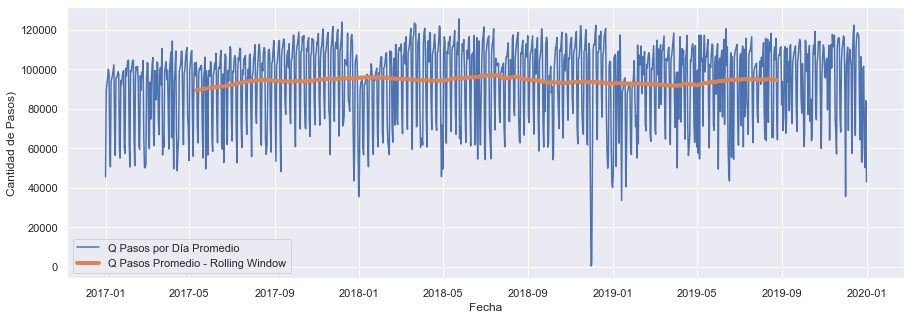

In [189]:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Q Pasos por Día Promedio')
plt.plot(diario_promedio_tendencia2, lw = 4, label = 'Q Pasos Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos)')
plt.legend()
plt.show()

Por ultimo aca podemos ver que la tendencia en estacion Illia cuando incluimos todos los tipos de pago. Es totalmente diferente a la tendencia anterior donde creiamos que estaba en desuso, sino que estan migrando a otras formas de pago. Por esto las conclusiones que hagamos por el estudio del modelo pueden estar equivocadas ya que no estamos viendo todos los datos.